# DS-SF-30 | Codealong 09: Linear Regression, Part 3

In [84]:
import os

import numpy as np
import pandas as pd
import math
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

## Part A - Model Fit and Customer Retention

In [85]:
year = [x for x in range(8)]
retention_rate = [1, 0.869, 0.743, 0.653, 0.593, 0.551, 0.517, 0.491]

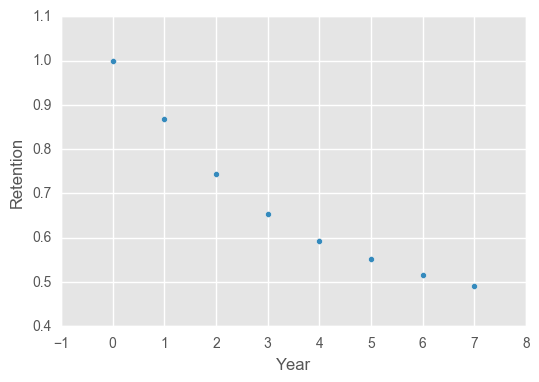

In [86]:
data = {'Year': year, 'Retention': retention_rate}
df = pd.DataFrame(data)
df.plot(kind='scatter',x='Year',y='Retention')

In [87]:
model = smf.ols(formula='Retention ~ Year',data=df).fit()
model.summary()

/Users/Elizabeth/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Retention   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     70.91
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           0.000153
Time:                        20:40:25   Log-Likelihood:                 13.061
No. Observations:                   8   AIC:                            -22.12
Df Residuals:                       6   BIC:                            -21.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9254      0.035     26.258      0.000         0.839     1.012
Year          -0.0709      0.008     -8.421      0.000        -0.092    -0.050
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   0.634
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.711
Skew:                           0.310   Prob(JB):                        0.701
Kurtosis:                       1.678   Cond. No.                         7.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
year_sq = [x**2 for x in year]
df['Year_sq'] = pd.Series(year_sq)

model_2 = smf.ols(formula='Retention ~ Year_sq',data=df).fit()
model_2.summary()


/Users/Elizabeth/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Retention   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     15.30
Date:                Thu, 12 Jan 2017   Prob (F-statistic):            0.00788
Time:                        20:40:25   Log-Likelihood:                 7.9253
No. Observations:                   8   AIC:                            -11.85
Df Residuals:                       6   BIC:                            -11.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.8276      0.053     15.568      0.000         0.698     0.958
Year_sq       -0.0086      0.002     -3.911      0.008        -0.014    -0.003
==============================================================================
Omnibus:                        1.121   Durbin-Watson:                   0.612
Prob(Omnibus):                  0.571   Jarque-Bera (JB):                0.752
Skew:                           0.631   Prob(JB):                        0.687
Kurtosis:                       2.185   Cond. No.                         35.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
yr_sqrt = [x**0.5 for x in year]
df['Year_sqrt'] = pd.Series(yr_sqrt)

model_3 = smf.ols(formula='Retention ~ Year_sqrt',data=df).fit()
model_3.summary()


/Users/Elizabeth/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Retention   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     325.5
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           1.87e-06
Time:                        20:40:25   Log-Likelihood:                 18.906
No. Observations:                   8   AIC:                            -33.81
Df Residuals:                       6   BIC:                            -33.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0245      0.021     47.916      0.000         0.972     1.077
Year_sqrt     -0.2062      0.011    -18.042      0.000        -0.234    -0.178
==============================================================================
Omnibus:                        5.364   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                1.731
Skew:                           1.127   Prob(JB):                        0.421
Kurtosis:                       3.344   Cond. No.                         5.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
model_4 = smf.ols(formula='Retention ~ Year_sqrt + Year',data=df).fit()
model_4.summary()

/Users/Elizabeth/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Retention   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     153.0
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           3.28e-05
Time:                        20:40:25   Log-Likelihood:                 19.379
No. Observations:                   8   AIC:                            -32.76
Df Residuals:                       5   BIC:                            -32.52
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0128      0.027     38.171      0.000         0.945     1.081
Year_sqrt     -0.1759      0.040     -4.389      0.007        -0.279    -0.073
Year          -0.0113      0.014     -0.792      0.464        -0.048     0.025
==============================================================================
Omnibus:                        2.155   Durbin-Watson:                   1.670
Prob(Omnibus):                  0.340   Jarque-Bera (JB):                1.007
Skew:                           0.837   Prob(JB):                        0.604
Kurtosis:                       2.533   Cond. No.                         22.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
yr_cbrt = [x**(.58) for x in year]
df['Year_other'] = pd.Series(yr_cbrt)

model_5 = smf.ols(formula='Retention ~ Year_other',data=df).fit()
model_5.summary()

/Users/Elizabeth/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Retention   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     417.5
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           8.93e-07
Time:                        20:40:25   Log-Likelihood:                 19.885
No. Observations:                   8   AIC:                            -35.77
Df Residuals:                       6   BIC:                            -35.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0069      0.018     55.586      0.000         0.963     1.051
Year_other    -0.1749      0.009    -20.433      0.000        -0.196    -0.154
==============================================================================
Omnibus:                        1.058   Durbin-Watson:                   1.450
Prob(Omnibus):                  0.589   Jarque-Bera (JB):                0.734
Skew:                           0.611   Prob(JB):                        0.693
Kurtosis:                       2.157   Cond. No.                         5.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
yr_cbrt = [x**(.575) for x in year]
df['Year_other'] = pd.Series(yr_cbrt)

model_6 = smf.ols(formula='Retention ~ Year_other',data=df).fit()
model_6.summary()

/Users/Elizabeth/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Retention   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     418.3
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           8.88e-07
Time:                        20:40:25   Log-Likelihood:                 19.893
No. Observations:                   8   AIC:                            -35.79
Df Residuals:                       6   BIC:                            -35.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0080      0.018     55.554      0.000         0.964     1.052
Year_other    -0.1767      0.009    -20.454      0.000        -0.198    -0.156
==============================================================================
Omnibus:                        1.204   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.548   Jarque-Bera (JB):                0.775
Skew:                           0.655   Prob(JB):                        0.679
Kurtosis:                       2.221   Cond. No.                         5.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
def prediction(yr):
    return 	1.0080 +  -0.1767 * (yr**0.575)
print(prediction(8))

0.42386491512860325


In [94]:
yr_log = [np.log(x+1) for x in year]
df['Year_log'] = pd.Series(yr_log)
print(df.head())

model_7 = smf.ols(formula='Retention ~ Year_log',data=df).fit()
model_7.summary()

   Retention  Year  Year_sq  Year_sqrt  Year_other  Year_log
0      1.000     0        0   0.000000    0.000000  0.000000
1      0.869     1        1   1.000000    1.000000  0.693147
2      0.743     2        4   1.414214    1.489677  1.098612
3      0.653     3        9   1.732051    1.880809  1.386294
4      0.593     4       16   2.000000    2.219139  1.609438


/Users/Elizabeth/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Retention   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     893.5
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           9.30e-08
Time:                        20:40:25   Log-Likelihood:                 22.898
No. Observations:                   8   AIC:                            -41.80
Df Residuals:                       6   BIC:                            -41.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0170      0.013     80.110      0.000         0.986     1.048
Year_log      -0.2564      0.009    -29.891      0.000        -0.277    -0.235
==============================================================================
Omnibus:                        3.578   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.167   Jarque-Bera (JB):                1.162
Skew:                           0.933   Prob(JB):                        0.559
Kurtosis:                       3.054   Cond. No.                         4.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
#predict_x = pd.Series([8,9,10,11])
#model.predict(predict_x)

def predict_2(yr):
    return 1.0170 - 0.2564 * np.log(yr + 1)

print(predict_2(8))

yrs = [8,9,10,11]
print([predict_2(x) for x in yrs])

0.453631618371
[0.45363161837099319, 0.42661718215632649, 0.40217965205449757, 0.37986993499435662]


# now with split b/w test and train

## Part B - One-Hot Encoding for Categorical Variables and SF Housing

In [96]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-09-zillow.csv'), index_col = 'ID')

In [97]:
df.drop(df[df.IsAStudio == 1].index, inplace = True)

In [98]:
smf.ols(formula = 'SalePrice ~ Baths', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     146.6
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           1.94e-31
Time:                        20:40:26   Log-Likelihood:                -1690.7
No. Observations:                 929   AIC:                             3385.
Df Residuals:                     927   BIC:                             3395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3401      0.099      3.434      0.001         0.146     0.535
Baths          0.5242      0.043     12.109      0.000         0.439     0.609
==============================================================================
Omnibus:                     1692.623   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2167434.305
Skew:                          12.317   Prob(JB):                         0.00
Kurtosis:                     238.345   Cond. No.                         5.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### What's the bathrooms' distribution in the dataset?

In [99]:
model.resid.mean()

-6.245004513516506e-17

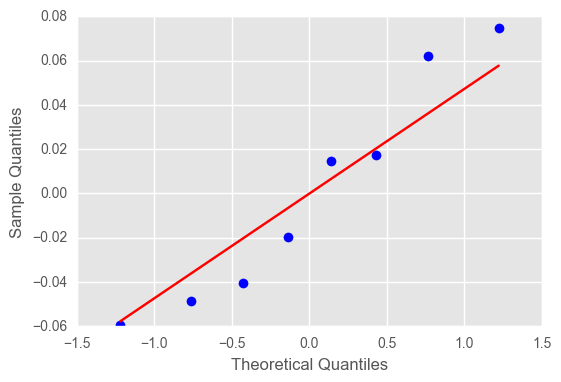

In [100]:
sm.qqplot(model.resid, line = 's')

pass

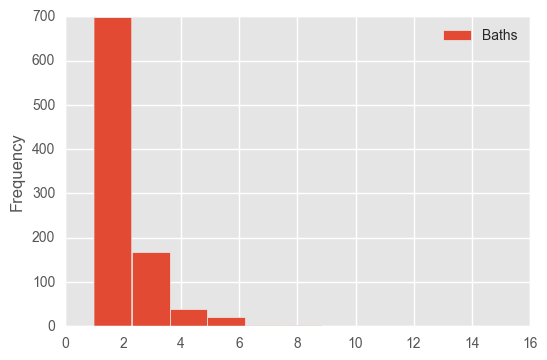

In [101]:
df[['Baths']].plot(kind='hist')

In [102]:
df.Baths.value_counts(dropna=False)

 1.00     333
 2.00     323
 3.00     105
 2.50      44
NaN        42
 1.50      37
 4.00      33
 3.50      18
 5.00      10
 6.00       8
         ... 
 7.00       2
 5.50       2
 1.10       1
 7.50       1
 8.00       1
 1.75       1
 2.25       1
 6.50       1
 1.25       1
 14.00      1
Name: Baths, dtype: int64

> ### Let's keep properties with 1, 2, 3, or 4 bathrooms

In [104]:
df = df[(df['Baths']==1) | (df['Baths']==2) | (df['Baths']==3.0) | (df['Baths']==4)]
# or df = df[df.Baths.isin([1,2,3,4])]

In [105]:
df.Baths.value_counts(dropna=False)

1.0    333
2.0    323
3.0    105
4.0     33
Name: Baths, dtype: int64

> ### Let's use `pandas`'s `get_dummies` to create a one-hot encoding of the `Bath` categorical feature

In [109]:
baths_df = pd.get_dummies(df.Baths,prefix='Bath')

In [110]:
baths_df

,Bath_1.0,Bath_2.0,Bath_3.0,Bath_4.0
ID,,,,
15063505,0.0,1.0,0.0,0.0
15064044,1.0,0.0,0.0,0.0
15064257,0.0,1.0,0.0,0.0
15064295,0.0,1.0,0.0,0.0
15064391,1.0,0.0,0.0,0.0
15064536,0.0,1.0,0.0,0.0
15064669,0.0,0.0,1.0,0.0
15065032,1.0,0.0,0.0,0.0
15065140,1.0,0.0,0.0,0.0


In [111]:
baths_df.rename(columns = {'Bath_1.0': 'Bath_1',
                           'Bath_2.0': 'Bath_2',
                           'Bath_3.0': 'Bath_3',
                           'Bath_4.0': 'Bath_4'}, inplace = True)

In [112]:
baths_df

,Bath_1,Bath_2,Bath_3,Bath_4
ID,,,,
15063505,0.0,1.0,0.0,0.0
15064044,1.0,0.0,0.0,0.0
15064257,0.0,1.0,0.0,0.0
15064295,0.0,1.0,0.0,0.0
15064391,1.0,0.0,0.0,0.0
15064536,0.0,1.0,0.0,0.0
15064669,0.0,0.0,1.0,0.0
15065032,1.0,0.0,0.0,0.0
15065140,1.0,0.0,0.0,0.0


In [113]:
df = df.join([baths_df])

In [114]:
df.columns

Index(['Address', 'DateOfSale', 'SalePrice', 'IsAStudio', 'Beds', 'Baths',
       'Size', 'LotSize', 'BuiltInYear', 'Bath_1', 'Bath_2', 'Bath_3',
       'Bath_4'],
      dtype='object')

### Activity | Linear modeling using `Bath`'s one-hot encoding

> ### `SalesPrice` as a function of `Bath_2`, `Bath_3`, and `Bath_4`

In [115]:
smf.ols(formula = 'SalePrice ~ Bath_2 + Bath_3 + Bath_4', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     11.78
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           1.49e-07
Time:                        20:43:45   Log-Likelihood:                -1314.2
No. Observations:                 794   AIC:                             2636.
Df Residuals:                     790   BIC:                             2655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9914      0.070     14.249      0.000         0.855     1.128
Bath_2         0.2831      0.099      2.855      0.004         0.088     0.478
Bath_3         0.4808      0.142      3.383      0.001         0.202     0.760
Bath_4         1.2120      0.232      5.231      0.000         0.757     1.667
==============================================================================
Omnibus:                     1817.972   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8069883.811
Skew:                          19.917   Prob(JB):                         0.00
Kurtosis:                     495.280   Cond. No.                         5.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### `SalesPrice` as a function of `Bath_1`, `Bath_3`, and `Bath_4`

In [116]:
smf.ols(formula = 'SalePrice ~ Bath_1 + Bath_3 + Bath_4', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     11.78
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           1.49e-07
Time:                        20:44:36   Log-Likelihood:                -1314.2
No. Observations:                 794   AIC:                             2636.
Df Residuals:                     790   BIC:                             2655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.2745      0.071     18.040      0.000         1.136     1.413
Bath_1        -0.2831      0.099     -2.855      0.004        -0.478    -0.088
Bath_3         0.1977      0.143      1.386      0.166        -0.082     0.478
Bath_4         0.9290      0.232      4.003      0.000         0.473     1.384
==============================================================================
Omnibus:                     1817.972   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8069883.811
Skew:                          19.917   Prob(JB):                         0.00
Kurtosis:                     495.280   Cond. No.                         5.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### `SalesPrice` as a function of `Bath_1`, `Bath_2`, and `Bath_4`

In [117]:
smf.ols(formula = 'SalePrice ~ Bath_2 + Bath_1 + Bath_4', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     11.78
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           1.49e-07
Time:                        20:44:37   Log-Likelihood:                -1314.2
No. Observations:                 794   AIC:                             2636.
Df Residuals:                     790   BIC:                             2655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.4722      0.124     11.881      0.000         1.229     1.715
Bath_2        -0.1977      0.143     -1.386      0.166        -0.478     0.082
Bath_1        -0.4808      0.142     -3.383      0.001        -0.760    -0.202
Bath_4         0.7313      0.253      2.886      0.004         0.234     1.229
==============================================================================
Omnibus:                     1817.972   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8069883.811
Skew:                          19.917   Prob(JB):                         0.00
Kurtosis:                     495.280   Cond. No.                         7.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### `SalesPrice` as a function of `Bath_1`, `Bath_2`, and `Bath_3`

In [119]:
smf.ols(formula = 'SalePrice ~ Bath_2 + Bath_3 + Bath_1', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     11.78
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           1.49e-07
Time:                        21:16:49   Log-Likelihood:                -1314.2
No. Observations:                 794   AIC:                             2636.
Df Residuals:                     790   BIC:                             2655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.2035      0.221      9.969      0.000         1.770     2.637
Bath_2        -0.9290      0.232     -4.003      0.000        -1.384    -0.473
Bath_3        -0.7313      0.253     -2.886      0.004        -1.229    -0.234
Bath_1        -1.2120      0.232     -5.231      0.000        -1.667    -0.757
==============================================================================
Omnibus:                     1817.972   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8069883.811
Skew:                          19.917   Prob(JB):                         0.00
Kurtosis:                     495.280   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Part C - The Adverstising Dataset

In [120]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-09-advertising.csv'))

In [121]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


### Plots

> ### Sales ~ TV

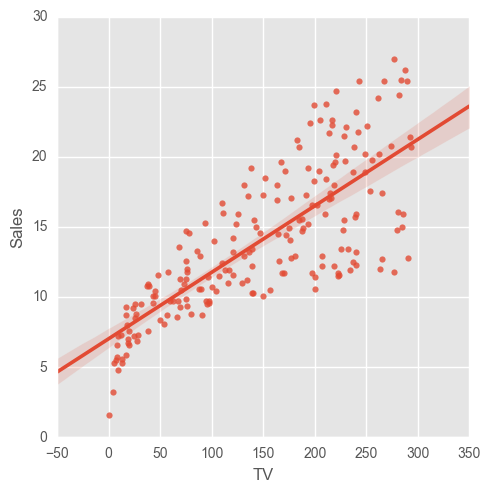

In [122]:
sns.lmplot(x = 'TV', y = 'Sales', data = df)

> ### Sales ~ Radio

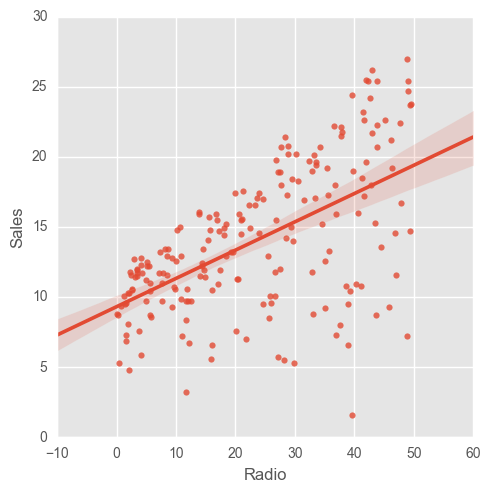

In [123]:
sns.lmplot(x = 'Radio', y = 'Sales', data = df)

> ### Sales ~ Newspaper

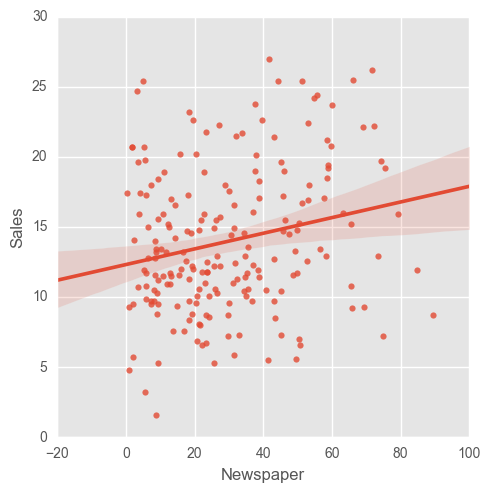

In [124]:
sns.lmplot(x = 'Newspaper', y = 'Sales', data = df)

### Simple linear regressions

> ### Sales ~ TV

In [125]:
model_tv = smf.ols(formula = 'Sales ~ TV', data = df).fit()

model_tv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     302.8
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           1.29e-41
Time:                        21:17:02   Log-Likelihood:                -514.27
No. Observations:                 198   AIC:                             1033.
Df Residuals:                     196   BIC:                             1039.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0306      0.462     15.219      0.000         6.120     7.942
TV             0.0474      0.003     17.400      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.404   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.551
Skew:                          -0.062   Prob(JB):                        0.759
Kurtosis:                       2.774   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### Sales ~ Radio

In [126]:
model_radio = smf.ols(formula = 'Sales ~ Radio', data = df).fit()

model_radio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     97.69
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           5.99e-19
Time:                        21:17:05   Log-Likelihood:                -566.70
No. Observations:                 198   AIC:                             1137.
Df Residuals:                     196   BIC:                             1144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.3166      0.560     16.622      0.000         8.211    10.422
Radio          0.2016      0.020      9.884      0.000         0.161     0.242
==============================================================================
Omnibus:                       20.193   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.115
Skew:                          -0.785   Prob(JB):                     9.56e-06
Kurtosis:                       3.582   Cond. No.                         51.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### Sales ~ Newspaper

In [127]:
model_newspaper = smf.ols(formula = 'Sales ~ Newspaper', data = df).fit()

model_newspaper.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     9.927
Date:                Thu, 12 Jan 2017   Prob (F-statistic):            0.00188
Time:                        21:17:06   Log-Likelihood:                -601.84
No. Observations:                 198   AIC:                             1208.
Df Residuals:                     196   BIC:                             1214.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     12.3193      0.639     19.274      0.000        11.059    13.580
Newspaper      0.0558      0.018      3.151      0.002         0.021     0.091
==============================================================================
Omnibus:                        5.835   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.303
Skew:                           0.333   Prob(JB):                       0.0706
Kurtosis:                       2.555   Cond. No.                         63.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Residuals

> ### Sales ~ TV

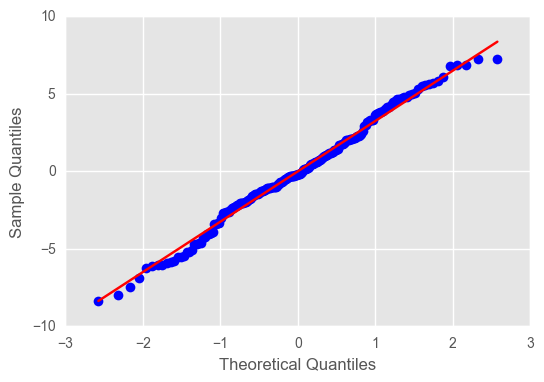

In [128]:
sm.qqplot(model_tv.resid, line = 's')

pass

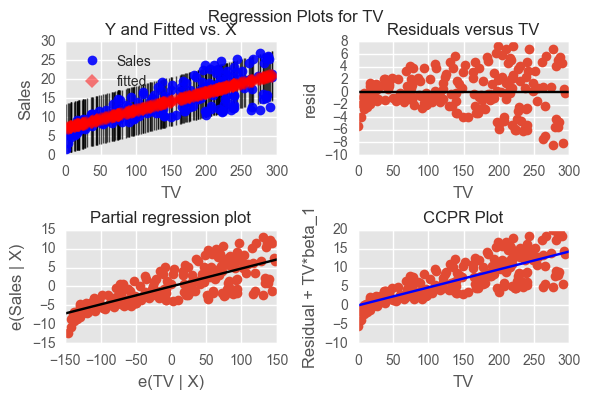

In [129]:
sm.graphics.plot_regress_exog(model_tv, 'TV')

pass

> ### Sales ~ Radio

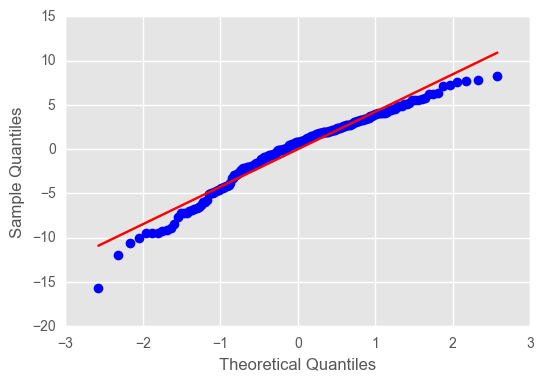

In [130]:
sm.qqplot(model_radio.resid, line = 's')

pass

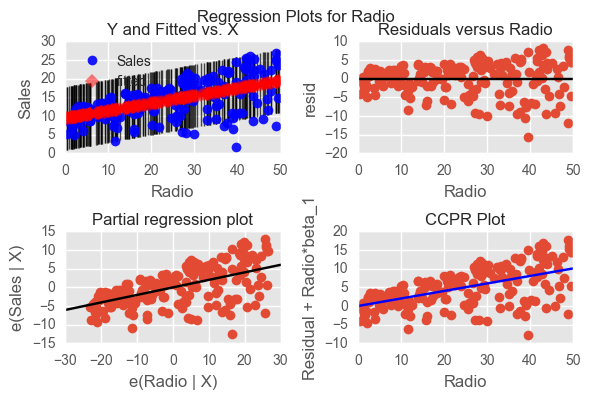

In [131]:
sm.graphics.plot_regress_exog(model_radio, 'Radio')

pass

> ### Sales ~ Newspaper

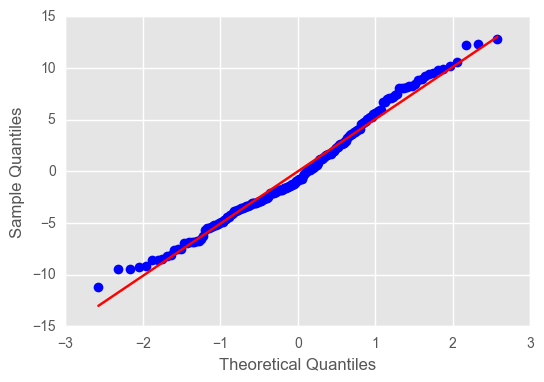

In [132]:
sm.qqplot(model_newspaper.resid, line = 's')

pass

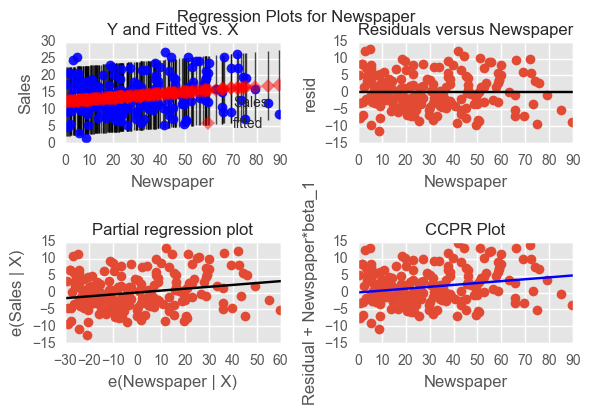

In [133]:
sm.graphics.plot_regress_exog(model_newspaper, 'Newspaper')

pass

> ### Sales ~ TV + Radio + Newspaper

In [140]:
model = smf.ols(formula = 'Sales ~ TV + Radio + Newspaper', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     553.5
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           8.35e-95
Time:                        21:19:43   Log-Likelihood:                -383.24
No. Observations:                 198   AIC:                             774.5
Df Residuals:                     194   BIC:                             787.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9523      0.318      9.280      0.000         2.325     3.580
TV             0.0457      0.001     32.293      0.000         0.043     0.048
Radio          0.1886      0.009     21.772      0.000         0.171     0.206
Newspaper     -0.0012      0.006     -0.187      0.852        -0.014     0.011
==============================================================================
Omnibus:                       59.593   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.654
Skew:                          -1.324   Prob(JB):                     8.66e-33
Kurtosis:                       6.299   Cond. No.                         457.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### Sales ~ TV + Radio

In [141]:
model = smf.ols(formula = 'Sales ~ TV + Radio', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     834.4
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           2.60e-96
Time:                        21:19:44   Log-Likelihood:                -383.26
No. Observations:                 198   AIC:                             772.5
Df Residuals:                     195   BIC:                             782.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9315      0.297      9.861      0.000         2.345     3.518
TV             0.0457      0.001     32.385      0.000         0.043     0.048
Radio          0.1880      0.008     23.182      0.000         0.172     0.204
==============================================================================
Omnibus:                       59.228   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.127
Skew:                          -1.321   Prob(JB):                     3.06e-32
Kurtosis:                       6.257   Cond. No.                         423.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

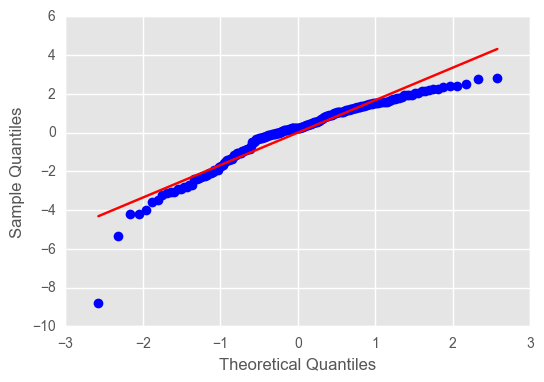

In [142]:
sm.qqplot(model.resid, line = 's')

pass

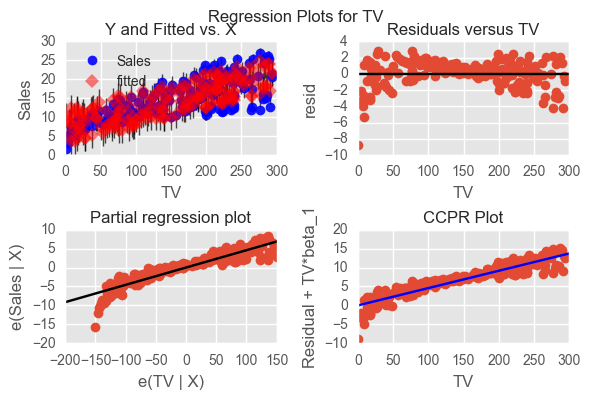

In [143]:
sm.graphics.plot_regress_exog(model, 'TV')

pass

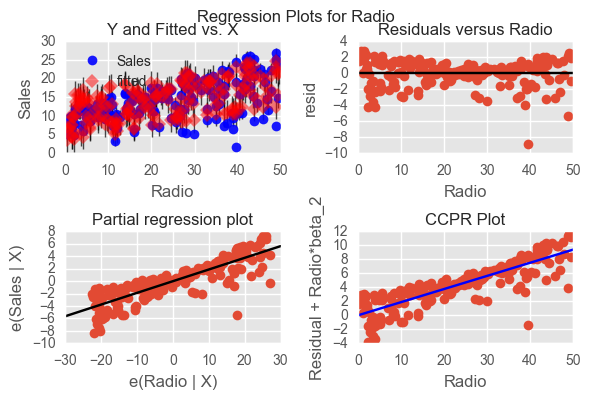

In [144]:
sm.graphics.plot_regress_exog(model, 'Radio')

pass

## Part D - Interaction Effects and Advertising

### Sales ~ TV + Radio + TV * Radio

In [145]:
model = smf.ols(formula = 'Sales ~ TV + Radio + TV * Radio', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1934.
Date:                Thu, 12 Jan 2017   Prob (F-statistic):          3.19e-144
Time:                        21:20:14   Log-Likelihood:                -267.07
No. Observations:                 198   AIC:                             542.1
Df Residuals:                     194   BIC:                             555.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.7577      0.247     27.304      0.000         6.270     7.246
TV             0.0190      0.002     12.682      0.000         0.016     0.022
Radio          0.0276      0.009      3.089      0.002         0.010     0.045
TV:Radio       0.0011   5.27e-05     20.817      0.000         0.001     0.001
==============================================================================
Omnibus:                      126.182   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1151.060
Skew:                          -2.306   Prob(JB):                    1.12e-250
Kurtosis:                      13.875   Cond. No.                     1.78e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

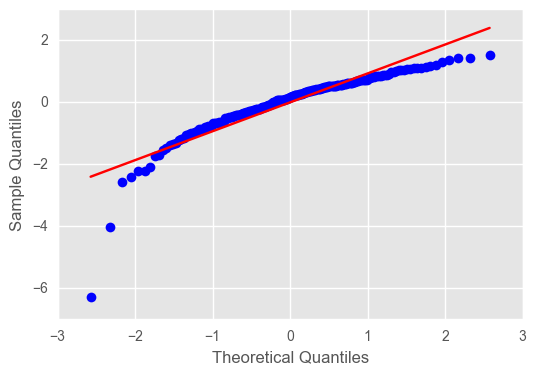

In [146]:
sm.qqplot(model.resid, line = 's')

pass

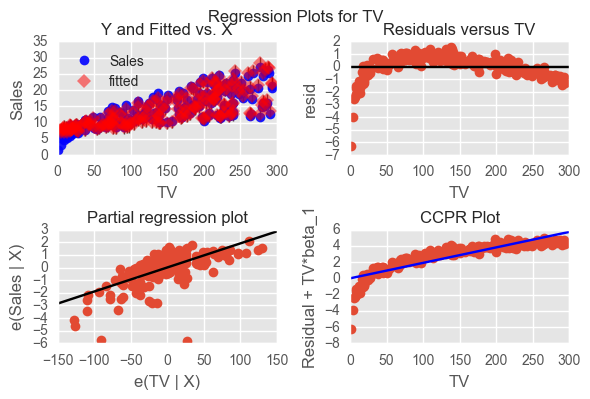

In [147]:
sm.graphics.plot_regress_exog(model, 'TV')

pass

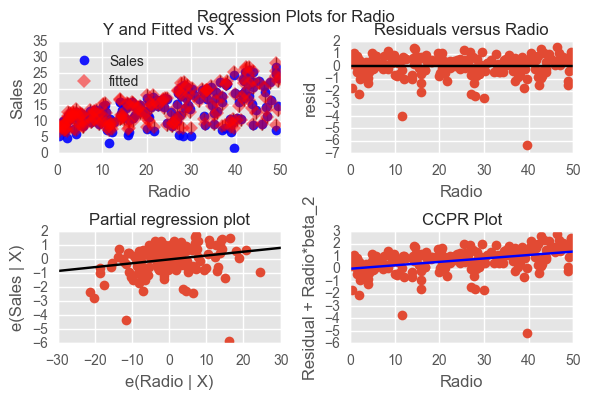

In [148]:
sm.graphics.plot_regress_exog(model, 'Radio')

pass

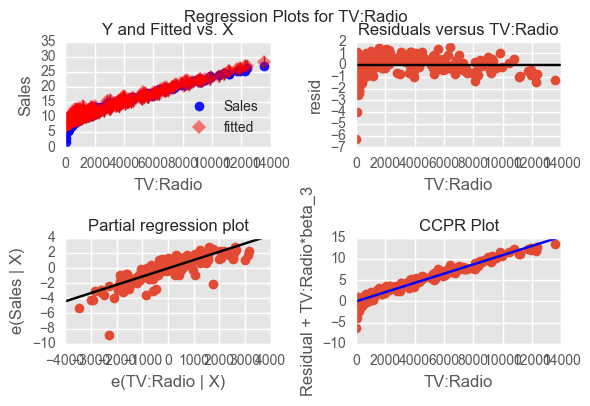

In [149]:
sm.graphics.plot_regress_exog(model, 'TV:Radio')

pass